<a href="https://colab.research.google.com/github/a-woodbury/RxVision/blob/master/Notebooks/rxv_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [0]:
import pandas as pd
import requests
from IPython.display import Image
from ftplib import FTP #needed to make the request to the server

# packages for processing images
! pip install rawpy
from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil, sys #required for moving files

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from pathlib import Path

# Create Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [45]:
typdict = {'NDC':'str'}
df = pd.read_csv('/content/drive/My Drive/RxID2/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','Part_#','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
#df = df[df.FILETYPE != '.WMV']# will remove video files from query
df['NDC_prod'] = df.NDC.str[:-2]
#df = df[df.NDC_prod.isin(ndcs_pack)]
df

,NDC,Part_#,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE,NDC_prod
0,00002322730,1,PillProjectDisc69/images/CLLLLUPGIX7J8MP1WWQ9W...,C3PI_Reference,STRATTERA 10MG,PillProjectDisc69,images,CLLLLUPGIX7J8MP1WWQ9WN4-CO0B5NV.CR2,.CR2,000023227
1,00002322730,1,PillProjectDisc98/images/PRNJ-AXZIQ!HUQKJJBP_D...,C3PI_Reference,STRATTERA 10MG,PillProjectDisc98,images,PRNJ-AXZIQ!HUQKJJBP_DV44ST0KN9.CR2,.CR2,000023227
2,00002322730,1,PillProjectDisc10/images/79U-YY6M1UUR6F127ZMAC...,C3PI_Test,STRATTERA 10MG,PillProjectDisc10,images,79U-YY6M1UUR6F127ZMACIWPEEXHLB.JPG,.JPG,000023227
3,00002322730,1,PillProjectDisc11/images/7WVFV5H74!ELFNQ_GUH92...,C3PI_Test,STRATTERA 10MG,PillProjectDisc11,images,7WVFV5H74!ELFNQ_GUH92E9ERM9P2K.JPG,.JPG,000023227
4,00002322730,1,PillProjectDisc20/images/B4CH0R9B7PEQ6GORRX-8X...,C3PI_Test,STRATTERA 10MG,PillProjectDisc20,images,B4CH0R9B7PEQ6GORRX-8XWOL-_G7W9_.JPG,.JPG,000023227
...,...,...,...,...,...,...,...,...,...,...
133769,99207046730,1,PillProjectDisc103/images/TY5OVXLLOXV6H4I1TDVT...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc103,images,TY5OVXLLOXV6H4I1TDVT4TFQ6TYEJ4.PNG,.PNG,992070467
133770,99207046730,1,PillProjectDisc31/images/BEIR3XK38EMGSDOZTWMUK...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc31,images,BEIR3XK38EMGSDOZTWMUK20JMK1IHJM.PNG,.PNG,992070467
133771,99207046730,1,PillProjectDisc69/images/CLJ1W40OS0XG5H6IVYT!N...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc69,images,CLJ1W40OS0XG5H6IVYT!NIFZEUNEOCH.PNG,.PNG,992070467
133772,99207046730,1,PillProjectDisc77/images/CSUHWDZ!XAZSEJHDANMFR...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc77,images,CSUHWDZ!XAZSEJHDANMFR8ED0SO2KS_.PNG,.PNG,992070467


In [46]:
len(df.NDC.value_counts().index)

4864

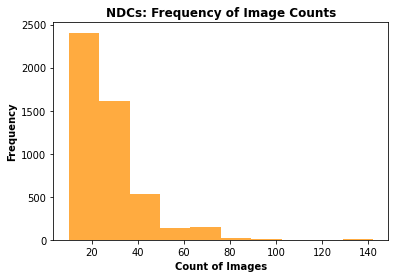

In [47]:
plt.hist(df.NDC.value_counts(), color='#ffab40')
plt.title('NDCs: Frequency of Image Counts', fontweight='bold')
plt.xlabel('Count of Images', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.savefig('NDCs: Frequency of Image Counts')
plt.show()

comment on how most of the drugs in the dataset will have fewer than 50 images

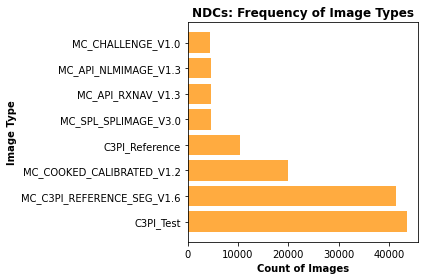

In [120]:
plt.barh(df.TYPE.value_counts().index,df.TYPE.value_counts().values, color='#ffab40')
plt.title('NDCs: Frequency of Image Types', fontweight='bold')
plt.xlabel('Count of Images', fontweight='bold')
plt.ylabel('Image Type', fontweight='bold',)
plt.tight_layout()
plt.savefig('Image Types')
plt.show()

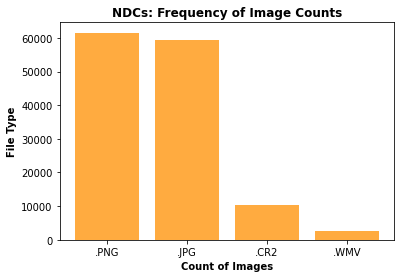

In [115]:
plt.bar(df.FILETYPE.value_counts().index,df.FILETYPE.value_counts().values, color='#ffab40')
plt.title('NDCs: Frequency of Image Counts', fontweight='bold')
plt.xlabel('Count of Images', fontweight='bold')
plt.ylabel('File Type', fontweight='bold',)
plt.savefig('File Types')
plt.show()

In [18]:
df.DRUG.value_counts(), df.NDC[df.DRUG.str.contains('LEVOTHYRO')].nunique()

(LEVOTHYROXINE SODIUM            756
 LISINOPRIL TABLETS USP          484
 SIMVASTATIN                     432
 WARFARIN SODIUM TABLETS, USP    425
 WARFARIN SODIUM                 422
                                ... 
 LOVAZA CAP 1GM                   11
 LAMICTAL 200MG TAB               11
 LEVITRA 20MG TABLETS             11
 LAMICTAL 25MG TAB                11
 LAMICTAL 150MG TAB               11
 Name: DRUG, Length: 2840, dtype: int64, 40)

comment on how levothyroxine is the most common drug with 40 NDCs

Now let's explore the FTP storage disk using ftplib

In [19]:
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')

'250 Directory successfully changed.'

In [21]:
ftp.retrlines('LIST')

-r-xr-xr-x    1 0        0            3422 Jul 10  2019 AAREADME
dr-xr-xr-x    2 0        0           12288 May 09  2019 ALLXML
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc1
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc10
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc100
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc101
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc102
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc103
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc104
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc105
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc106
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc107
dr-xr-xr-x    3 0        0            4096 May 09  2019 PillProjectDisc108
dr-xr-xr-x    3 0        0            4096 May 09 

'226 Directory send OK.'

In [25]:
ftp.cwd('PillProjectDisc1')

'250 Directory successfully changed.'

In [26]:
ftp.retrlines('LIST')

-r-xr-xr-x    1 0        0             173 Sep 14  2018 MedicosConsultantsExport_1.xml
dr-xr-xr-x    2 0        0          131072 Oct 10  2018 images


'226 Directory send OK.'

In [27]:
ftp.cwd('images')

'250 Directory successfully changed.'

In [28]:
ftp.retrlines('LIST')

-r-xr-xr-x    1 0        0        112304276 Sep 14  2018 !!0MOPXZJMHNBIWS_TN7_G7TNNGMXT.PNG
-r-xr-xr-x    1 0        0         1036521 Sep 14  2018 !!11F_JYDH1-PK9TCJNDAHE6B8C6TR.JPG
-r-xr-xr-x    1 0        0        23267356 Sep 14  2018 !!2EUB7OCQ!7YH1VQ8JC!I5AGM_XHD.CR2
-r-xr-xr-x    1 0        0          223622 Sep 14  2018 !!2URC27CGGZKYVY2MCA6DK5NKB0SJ.JPG
-r-xr-xr-x    1 0        0        108805613 Sep 14  2018 !!3NJOXIK0PN7R!JDPYXWR1B9_XQH6.PNG
-r-xr-xr-x    1 0        0         2923965 Sep 14  2018 !!4GO!WQ2NHYD-JTAU0GH!8JW8MRCV.PNG
-r-xr-xr-x    1 0        0         3000590 Sep 14  2018 !!5I2MM7HX0F28YBQDBIOGP9597-4B.PNG
-r-xr-xr-x    1 0        0         1318342 Sep 14  2018 !!68DTB1-738!6RRY8NA6CCRE541AG.PNG
-r-xr-xr-x    1 0        0         4164927 Sep 14  2018 !!7KX5XC5!WZ4C7105-7V0DVWAXUK2.PNG
-r-xr-xr-x    1 0        0         6607548 Sep 14  2018 !!9W49YF4L!E7SRKQQ3Z_CBX7Y8K8E.PNG
-r-xr-xr-x    1 0        0         3900259 Sep 14  2018 !!AL_S32_MMZYQFMGP9WUKGMRUS3_O.P

'226 Directory send OK.'

We now know how to access a folder in the ftp location, and will use code to select specific files we want to use. 